<a href="https://colab.research.google.com/github/sandhyavisu/MINIPJT-2/blob/main/gradient_boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


STEP:1 **Gather** **Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive



STEP:2 **Preprocess data**

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

In [3]:

images=[]
target = []
flat_data = []

DATADIR = '/content/drive/MyDrive/pjt'
CATEGORIES = ['clock','lion'] # Name the folder with these categories

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  #print(class_num) #label encoding the values
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #plt.imshow(img_array)  
    img_resized = resize(img_array,(150,150,3)) # Value gets converted 0-1 from 0-255
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)


flat_data=np.array(flat_data)
target = np.array(target)
images = np.array(images)


In [4]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [5]:
flat_data

array([[0.83309804, 0.83309804, 0.83309804, ..., 0.82430536, 0.82430536,
        0.82430536],
       [0.99607843, 0.99607843, 0.99607843, ..., 0.99607843, 0.99607843,
        0.99607843],
       [0.69558954, 0.72696209, 0.73480523, ..., 0.57955556, 0.58739869,
        0.58431373],
       ...,
       [0.22239216, 0.23831373, 0.23403922, ..., 0.55168627, 0.87172549,
        0.42415686],
       [0.12318083, 0.19375599, 0.15323747, ..., 0.79435294, 0.77082353,
        0.77866667],
       [0.34683486, 0.44077124, 0.13725316, ..., 0.41227451, 0.33776471,
        0.27109804]])

<BarContainer object of 2 artists>

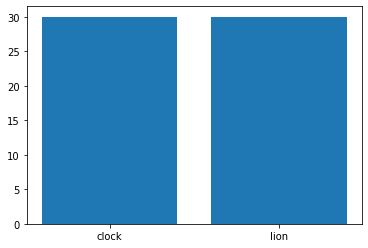

In [6]:
unique,count= np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

STEP:3 **Apply any classification Algorithm with best parameters using GridSearch CV**

 Splitting of data into train and test


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=10)

In [8]:
print(y_train.shape)
print(y_test.shape)

(42,)
(18,)


HYPER PARAMETER tuning of gradient boosting classifier using gridsearchcv

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
model = GradientBoostingClassifier()
param = {
    'max_features':[1,2,3,4,5,6],
    'max_depth': [1,2,3,4,5,6],
    'n_estimators': [20,40,50,70,100],
    'learning_rate': [0.001, 0.01,0.1,0.25,0.5,0.4]
}

grid = GridSearchCV(model,param,cv=5,n_jobs=-1)
grid.fit(x_train,y_train)
grid.best_params_


{'learning_rate': 0.5, 'max_depth': 2, 'max_features': 5, 'n_estimators': 20}

Apply gradient boosting  Classifier-
Fit the model

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(learning_rate =0.5, max_depth= 5, max_features= 5, n_estimators= 20)

model.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=5,
                           max_features=5, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Predict the model

In [11]:
y_pred = model.predict(x_test)

STEP:4 Evaluate the model using Confusion Matrix and classification report

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_pred,y_test)

0.8888888888888888

In [13]:
confusion_matrix(y_pred,y_test)

array([[8, 0],
       [2, 8]])

In [14]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.80      0.89        10

    accuracy                           0.89        18
   macro avg       0.90      0.90      0.89        18
weighted avg       0.91      0.89      0.89        18



In [15]:
# For saving the model in ML, use Pickle, Joblib
import pickle
pickle.dump(model,open('image_model.p','wb'))


In [16]:
model=pickle.load(open('image_model.p','rb'))

enter ur urlhttps://ii1.pepperfry.com/media/catalog/product/r/a/568x625/random-multicolour-mdf-wood-15-x-2-x-15-inch-ocean-wall-clock-random-multicolour-mdf-wood-15-x-2-x-1-cfr6zn.jpg
(625, 568, 3)
predicted output:clock


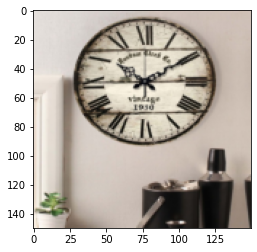

In [19]:
#testing a brand new image
flat_data = []
url = input('enter ur url')

img = imread(url)

img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'predicted output:{y_out}')

In [20]:
!pip install ipykernel==4.1.1
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet
from pyngrok import ngrok

     |████████████████████████████████| 92kB 3.5MB/s 
ERROR: ipywidgets 7.6.3 has requirement ipykernel>=4.5.1, but you'll have ipykernel 4.1.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 4.1.1 which is incompatible.
  Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1


     |████████████████████████████████| 7.0MB 5.1MB/s 
     |████████████████████████████████| 163kB 51.2MB/s 
     |████████████████████████████████| 81kB 9.1MB/s 
     |████████████████████████████████| 4.6MB 57.8MB/s 
     |████████████████████████████████| 112kB 47.0MB/s 
     |████████████████████████████████| 71kB 7.9MB/s 
     |████████████████████████████████| 122kB 59.5MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.0 which is incompatible.


In [21]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image


#st.set_option('deprecation.showfileUploaderEncoding',False)
st.title('image classifier')
st.text('upload image')



model=pickle.load(open('image_model.p','rb'))



uploaded_file=st.file_uploader("choose an image",type="jpg")


if uploaded_file is not None:
  img=Image.open(uploaded_file)
  st.image(img,caption='uploaded image')

  if st.button('predict'):
    st.write('result...')
    CATEGORIES = ['clock','lion']
    flat_data=[]


    img=np.array(img)
    img_resized=resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data=np.array(flat_data)
    
    
    y_out = model.predict(flat_data)
    y_out = CATEGORIES[y_out[0]]
    st.title(f'predicted output:{y_out}')
    q=model.predict_proba(flat_data)
    for index,item in enumerate(CATEGORIES):
      st.write(f'{item}:{q[0][index]*100}%')



Writing app.py


In [22]:
!nohup streamlit run app.py &
url=ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


'http://cf28068081c1.ngrok.io'